In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
import pandas_datareader as data # library used to read financial data from interner in df

In [ ]:
!pip install --upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip show pandas_datareader

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, lxml, requests
Required-by: 


In [ ]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# defining start and end time for the data
start = dt.datetime(2010,1,1)
end = dt.datetime(2021,12,30)

df = data.DataReader('AAPL','yahoo',start=start,end=end)
df.head()

In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.289444
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.255432
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.344925
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.171738
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.545364


In [ ]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526475
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.453411


In [ ]:
df.drop(['Date','Adj Close'], axis = 1)

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0
...,...,...,...,...,...
3016,180.419998,177.070007,177.089996,180.330002,74919600.0
3017,181.330002,178.529999,180.160004,179.289993,79144300.0
3018,180.630005,178.139999,179.330002,179.380005,62348900.0
3019,180.570007,178.089996,179.470001,178.199997,59773000.0


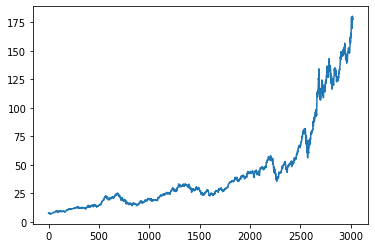

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

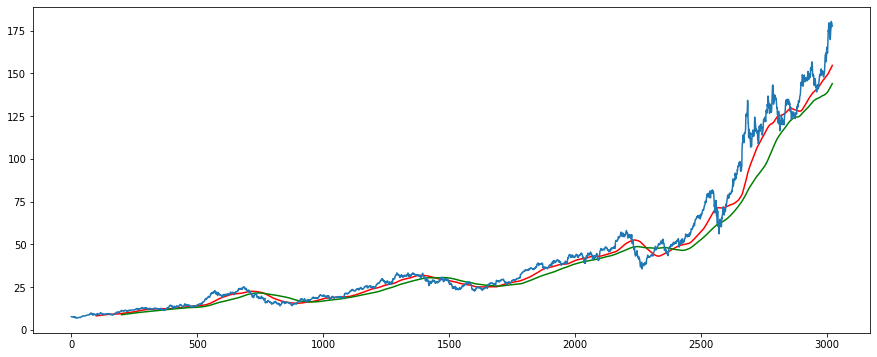

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.plot(df.Close)

In [ ]:
df.shape

(3021, 7)

In [ ]:
# splitting data into training and testing
data_trainig = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):])

In [ ]:
data_trainig.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_trainig)
data_training_array.shape

(2114, 1)

In [ ]:
x_train = []
y_train = []

for i in range (100, len(data_training_array)):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

In [ ]:
x_train, y_train = np.asarray(x_train), np.asarray(y_train)

In [ ]:
print(type(x_train))
print(type(y_train))
print(len(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
2014


# ML model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 33s 346ms/step - loss: 0.0423
Epoch 2/50
63/63 [==============================] - 19s 296ms/step - loss: 0.0095
Epoch 3/50
63/63 [==============================] - 19s 296ms/step - loss: 0.0068
Epoch 4/50
63/63 [==============================] - 19s 295ms/step - loss: 0.0060
Epoch 5/50
63/63 [==============================] - 19s 297ms/step - loss: 0.0055
Epoch 6/50
63/63 [==============================] - 20s 324ms/step - loss: 0.0056
Epoch 7/50
63/63 [==============================] - 19s 295ms/step - loss: 0.0052
Epoch 8/50
63/63 [==============================] - 19s 296ms/step - loss: 0.0049
Epoch 9/50
63/63 [==============================] - 19s 295ms/step - loss: 0.0050
Epoch 10/50
63/63 [==============================] - 19s 295ms/step - loss: 0.0051
Epoch 11/50
63/63 [==============================] - 19s 295ms/step - loss: 0.0048
Epoch 12/50
63/63 [==============================] - 19s 296ms/step - loss: 0.0044
Epoch 13/50
6

In [ ]:
model.save('lstm_model.h5')

In [ ]:
data_testing.shape

(907, 1)

In [ ]:
data_testing_array = scaler.fit_transform(data_testing)
data_testing_array.shape

(907, 1)

In [ ]:
x_test = []
y_test = []

for i in range (100, len(data_testing_array)):
  x_test.append(data_testing_array[i-100:i])
  y_test.append(data_testing_array[i,0])

In [ ]:
x_test, y_test = np.asarray(x_test), np.asarray(y_test)

In [ ]:
print(type(x_test))
print(type(y_test))
print(len(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
807


In [ ]:
# Prediction

y_predicted = model.predict(x_test)

26/26 [==============================] - 3s 85ms/step


In [ ]:
scaler.scale_

array([0.00690691])

In [ ]:
scale_factor = 1/scaler.scale_
y_predicted = y_predicted*scale_factor
y_test = y_test * scale_factor

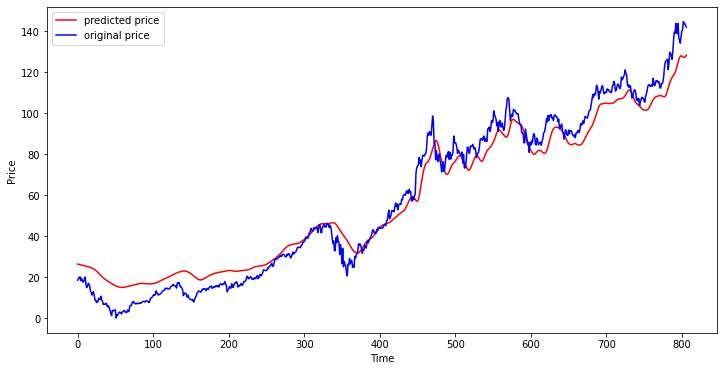

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_predicted, 'r', label="predicted price")
plt.plot(y_test, 'b', label="original price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
